# <font color= "midnightblue" > Simulation of Prices of Coupon-Bearing Bonds using CIR

In [27]:
import numpy as np
import pandas as pd
import edhec_risk_ins as eri
%matplotlib inline 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
eri.bond_price(5,100,.05,12,.03)

0    109.275393
dtype: float64

In [4]:
rates, zc_prices = eri.cir_1(10,500,b=0.03,r_0=0.03)

In [6]:
eri.bond_price(5,100,.05,12,rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

#### to see the bond prices at time 0 with first 3 scenarios. Exactly the same as the one we got before

In [7]:
eri.bond_price(5,100,.05,12,rates.iloc[1][[1,2,3]])

1    109.198796
2    108.820946
3    111.400701
dtype: float64

In [15]:
rates[[1,2,3,4,5]].head()

,1,2,3,4,5
0,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.030157,0.030936,0.025679,0.033641,0.029745
2,0.030130,0.028076,0.028016,0.035519,0.028367
3,0.030178,0.024712,0.028904,0.036130,0.027438
4,0.027227,0.020713,0.031179,0.034337,0.026866


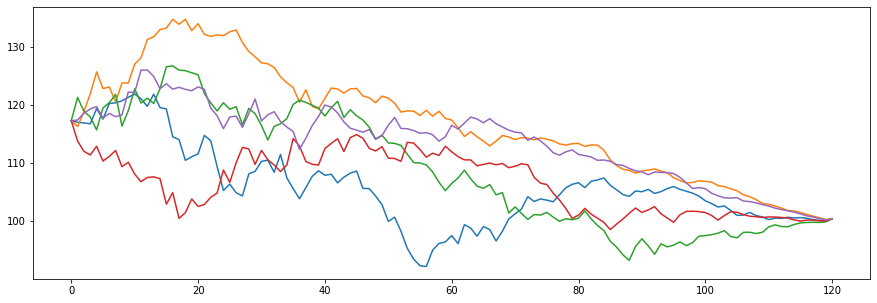

In [22]:
eri.bond_price(10,100,.05,12,rates[[1,2,3,4,5]]).plot(legend=False, figsize=(15,5))

###### 10 year to maturity and 12 terms for each year
generate random bond prices

In [20]:
prices = eri.bond_price(10,100,.05,12,rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,116.989,116.263,121.272,113.778,117.377
2,116.892,118.819,118.877,112.004,118.545
3,116.724,121.89,117.906,111.384,119.282
4,119.336,125.636,115.69,112.869,119.675
...,...,...,...,...,...
116,100.515,101.183,99.7975,100.2,100.931
117,100.284,100.877,99.8282,100.207,100.734
118,100.136,100.607,99.8028,100.09,100.46
119,100.072,100.302,99.901,100.068,100.229


In [26]:
bond_ret = prices.pct_change().dropna()
eri.annualize_rets(bond_ret,12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

##### 负的收益是由于未考虑支付的coupon，只考虑了capital gain meaning that it is a price return not TOTAL RETURN that we computed 

In [29]:
p = eri.bond_price(10,100,.05,12,rates[[1,2,3,4]])
btr = eri.bond_total_return(p,100,.05,12)
eri.annualize_rets(btr,12)

1    0.032379
2    0.027891
3    0.031270
4    0.031934
dtype: float64

In [30]:
price_10 = eri.bond_price(10,100,.05,12,rates) #10 year bond
price_10[[1,2,3]].tail()

,1,2,3
116,100.515,101.183,99.7975
117,100.284,100.877,99.8282
118,100.136,100.607,99.8028
119,100.072,100.302,99.901
120,100.417,100.417,100.417


In [31]:
price_30 = eri.bond_price(30,100,.05,12,rates) #30 year bond
price_30[[1,2,3]].tail()

,1,2,3
116,122.732,162.722,92.5562
117,116.072,161.504,91.6738
118,111.154,164.316,86.2841
119,111.788,163.643,86.2931
120,113.904,171.267,89.7574


In [32]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,139.075,137.172,150.745
2,139.076,144.262,144.419
3,138.888,153.234,142.067
4,146.315,164.869,136.399


In [33]:
rets_30 = eri.bond_total_return(price_30,100,.05,12)
rets_10 = eri.bond_total_return(price_10,100,.05,12)
rets_bond = 0.6*rets_10 + 0.4*rets_30

In [35]:
mean_rets_bonds = rets_bond.mean(axis='columns')
eri.Summary_Stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var(5%),HistoricCVaR(5%),Sharp Ratio,Max Drawrown
0,0.034909,0.003999,0.314259,3.003994,-0.001078,-0.000783,-0.000783,0.0


In [40]:
price_eq = eri.gbm(n_years =10,n_scenarios=500,mu=0.07,sigma=0.15)
price_eq.shape

(121, 500)

In [41]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [42]:
rets_bond.shape

(120, 500)

In [43]:
rets = .7*rets_eq +.3*rets_bond
rets_mean = rets.mean(axis='columns')
eri.Summary_Stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher Var(5%),HistoricCVaR(5%),Sharp Ratio,Max Drawrown
0,0.059684,0.004881,0.532706,3.363085,-0.002766,-0.002359,-0.002359,0.0
